<a href="https://colab.research.google.com/github/vedanshsahu/colaboratory-notebooks/blob/master/Synthetic_Web_Traffic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synethetic Web Traffic Dataset

This notebook analyzes a synthetic web traffic dataset for the website https://onpotatotime.com. The goal is to make a data-driven business decision between two landing pages under consideration:

1. Landing Page A features a video, explaining how PotatoTime works.
2. Landing Page B features a new pricing section of the webpage, more clearly explaining how pricing works (completely fictional pricing).


In [ ]:
# Download file containing dataset
from urllib.request import urlretrieve
urlretrieve("https://bitbucket.org/alvinwan/skillshare-data-101/raw/9b7ed1fd0b4b73fdd3f5a4a6cf67a532efb79635/views.pkl", filename="views.pkl")

('views.pkl', <http.client.HTTPMessage at 0x7fa0ce98c7d0>)

Preprocessing Data in Pandas

The output below shows a prettified sampling of data.

In [ ]:
import pandas as pd
df = pd.read_pickle("views.pkl")
df

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,webpage
created_at,,,,,,
2020-01-01 22:26:00,466.0,51.402986,3.003098,0.000000,True,A
2020-01-01 09:03:00,452.0,14.306381,14.203443,0.000000,True,A
2020-01-01 18:26:00,414.0,29.431619,3.958222,0.000000,True,A
2020-01-01 04:46:00,412.0,35.388779,1.629017,0.000000,True,A
2020-01-01 07:58:00,388.0,17.810023,13.045069,0.000000,True,A
...,...,...,...,...,...,...
2020-04-09 20:06:00,408.0,0.000000,10.592185,2.328005,False,B
2020-04-09 05:08:00,461.0,0.000000,13.423557,1.857177,False,B
2020-04-09 08:38:00,535.0,0.000000,8.708851,1.313290,False,B


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


page_load_ms       700.903239
video_watched_s      7.951220
product_s            7.999328
pricing_s            0.996568
has_clicked          0.342995
dtype: float64

In [ ]:
df.min()

page_load_ms          350.0
video_watched_s         0.0
product_s          1.000084
pricing_s               0.0
has_clicked           False
webpage                   A
dtype: object

In [ ]:
df.drop_duplicates()

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,webpage
created_at,,,,,,
2020-01-01 22:26:00,466.0,51.402986,3.003098,0.000000,True,A
2020-01-01 09:03:00,452.0,14.306381,14.203443,0.000000,True,A
2020-01-01 18:26:00,414.0,29.431619,3.958222,0.000000,True,A
2020-01-01 04:46:00,412.0,35.388779,1.629017,0.000000,True,A
2020-01-01 07:58:00,388.0,17.810023,13.045069,0.000000,True,A
...,...,...,...,...,...,...
2020-04-09 20:06:00,408.0,0.000000,10.592185,2.328005,False,B
2020-04-09 05:08:00,461.0,0.000000,13.423557,1.857177,False,B
2020-04-09 08:38:00,535.0,0.000000,8.708851,1.313290,False,B


In [ ]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
df["video_watched_s"].max()

69.9998447428469

In [ ]:
df["video_watched_s_trunc"] = df["video_watched_s"].clip(0,60)
df

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,webpage,video_watched_s_trunc
created_at,,,,,,,
2020-01-01 22:26:00,466.0,51.402986,3.003098,0.000000,True,A,51.402986
2020-01-01 09:03:00,452.0,14.306381,14.203443,0.000000,True,A,14.306381
2020-01-01 18:26:00,414.0,29.431619,3.958222,0.000000,True,A,29.431619
2020-01-01 04:46:00,412.0,35.388779,1.629017,0.000000,True,A,35.388779
2020-01-01 07:58:00,388.0,17.810023,13.045069,0.000000,True,A,17.810023
...,...,...,...,...,...,...,...
2020-04-09 20:06:00,408.0,0.000000,10.592185,2.328005,False,B,0.000000
2020-04-09 05:08:00,461.0,0.000000,13.423557,1.857177,False,B,0.000000
2020-04-09 08:38:00,535.0,0.000000,8.708851,1.313290,False,B,0.000000


In [ ]:
df.index.max()-df.index.min()

Timedelta('99 days 23:58:00')

In [ ]:
import datetime
def events_per_day(df):
  datetimes = df.index
  days = datetimes.floor('d')
  events_per_day = days.value_counts()
  return events_per_day.sort_index()


In [ ]:
views_per_day = events_per_day(df)
views_per_day

2020-01-01     985
2020-01-02    1078
2020-01-03     930
2020-01-04    1134
2020-01-05     845
              ... 
2020-04-05    1919
2020-04-06    1813
2020-04-07    1727
2020-04-08    1952
2020-04-09    1798
Name: created_at, Length: 100, dtype: int64

In [ ]:
def get_click_events(df):
  selector =  df["has_clicked"]
  clicks = df[selector]
  return clicks

In [ ]:
clicks =  get_click_events(df)
clicks

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,webpage,video_watched_s_trunc
created_at,,,,,,,
2020-01-01 22:26:00,466.0,51.402986,3.003098,0.000000,True,A,51.402986
2020-01-01 09:03:00,452.0,14.306381,14.203443,0.000000,True,A,14.306381
2020-01-01 18:26:00,414.0,29.431619,3.958222,0.000000,True,A,29.431619
2020-01-01 04:46:00,412.0,35.388779,1.629017,0.000000,True,A,35.388779
2020-01-01 07:58:00,388.0,17.810023,13.045069,0.000000,True,A,17.810023
...,...,...,...,...,...,...,...
2020-04-09 01:57:00,508.0,0.000000,10.841009,2.430239,True,B,0.000000
2020-04-09 19:48:00,410.0,0.000000,7.277680,2.517139,True,B,0.000000
2020-04-09 02:52:00,395.0,0.000000,2.906846,1.083408,True,B,0.000000


In [ ]:
clicks =  get_click_events(df)
clicks_per_day = events_per_day(clicks)
clicks_per_day.values

array([514, 494, 509, 556, 489, 471, 524, 502, 435, 500, 539, 493, 503,
       502, 523, 446, 498, 535, 541, 555, 498, 441, 496, 540, 502, 464,
       488, 490, 499, 527, 489, 518, 469, 417, 453, 478, 414, 471, 398,
       437, 470, 435, 410, 443, 432, 397, 401, 385, 372, 345, 370, 352,
       389, 382, 389, 362, 324, 350, 397, 371, 350, 374, 322, 315, 413,
       369, 345, 265, 302, 292, 281, 287, 323, 307, 269, 279, 288, 314,
       294, 307, 301, 303, 351, 320, 309, 317, 295, 345, 376, 363, 368,
       358, 403, 406, 358, 362, 381, 404, 457, 404])

In [ ]:
clicks_per_day.values <= views_per_day.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
df.corr()

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,video_watched_s_trunc
page_load_ms,1.000000,-0.090894,0.001700,-0.606251,-0.394026,-0.090442
video_watched_s,-0.090894,1.000000,0.002235,-0.479859,0.329487,0.998846
product_s,0.001700,0.002235,1.000000,-0.003961,-0.001078,0.002131
pricing_s,-0.606251,-0.479859,-0.003961,1.000000,0.104316,-0.485543
has_clicked,-0.394026,0.329487,-0.001078,0.104316,1.000000,0.328302
video_watched_s_trunc,-0.090442,0.998846,0.002131,-0.485543,0.328302,1.000000


In [ ]:
df["webpage"]== "A"

created_at
2020-01-01 22:26:00     True
2020-01-01 09:03:00     True
2020-01-01 18:26:00     True
2020-01-01 04:46:00     True
2020-01-01 07:58:00     True
                       ...  
2020-04-09 20:06:00    False
2020-04-09 05:08:00    False
2020-04-09 08:38:00    False
2020-04-09 09:17:00    False
2020-04-09 02:56:00    False
Name: webpage, Length: 119159, dtype: bool

In [ ]:
viewsA = df[df["webpage"]== "A"]
viewsB = df[df["webpage"]== "B"]
print(viewsA["has_clicked"].mean())
print(viewsB["has_clicked"].mean())

0.28972509913497413
0.39660223599137934


In [ ]:
viewsA.corr()

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,video_watched_s_trunc
page_load_ms,1.000000,-0.672894,-0.001031,NaN,-0.631073,-0.681464
video_watched_s,-0.672894,1.000000,0.000985,NaN,0.670155,0.998451
product_s,-0.001031,0.000985,1.000000,NaN,-0.002161,0.000783
pricing_s,NaN,NaN,NaN,NaN,NaN,NaN
has_clicked,-0.631073,0.670155,-0.002161,NaN,1.000000,0.672252
video_watched_s_trunc,-0.681464,0.998451,0.000783,NaN,0.672252,1.000000


In [ ]:
viewsB.corr()

,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,video_watched_s_trunc
page_load_ms,1.000000,NaN,0.002346,0.002352,-0.010054,NaN
video_watched_s,NaN,NaN,NaN,NaN,NaN,NaN
product_s,0.002346,NaN,1.000000,-0.003872,0.000611,NaN
pricing_s,0.002352,NaN,-0.003872,1.000000,0.000418,NaN
has_clicked,-0.010054,NaN,0.000611,0.000418,1.000000,NaN
video_watched_s_trunc,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Corelation with clicking')

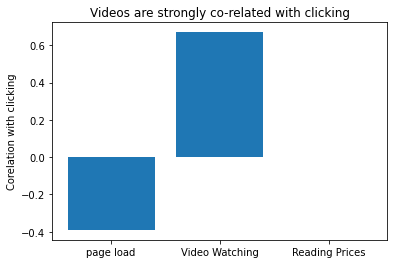

In [ ]:
import matplotlib.pyplot as plt
plt.title("Videos are strongly co-related with clicking")
plt.bar(["page load","Video Watching", "Reading Prices"],[-0.39,0.67,0.0004])
plt.ylabel("Corelation with clicking")

In [ ]:
def get_daily_stats(df):
  grouper = pd.Grouper(freq="D")
  groups = df.groupby(grouper)
  daily = groups.mean()
  return daily

In [ ]:
daily_viewsA = get_daily_stats(viewsA)
daily_ViewsB = get_daily_stats(viewsB)
daily_viewsA


,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,video_watched_s_trunc
created_at,,,,,,
2020-01-01,446.075000,32.205020,7.819558,0.0,0.653846,31.671114
2020-01-02,460.297834,29.923123,8.013138,0.0,0.581227,29.557520
2020-01-03,448.813417,29.291098,7.966730,0.0,0.580713,29.003593
2020-01-04,490.743007,30.302889,7.889255,0.0,0.576923,29.889845
2020-01-05,501.434590,30.530966,7.890801,0.0,0.680710,29.973603
...,...,...,...,...,...,...
2020-04-05,1583.331230,3.153252,8.169417,0.0,0.022082,3.138869
2020-04-06,1576.081021,3.682721,8.072359,0.0,0.032186,3.659914
2020-04-07,1537.583705,3.637404,7.920521,0.0,0.029018,3.594858


Text(0, 0.5, 'Clickthrough rate')

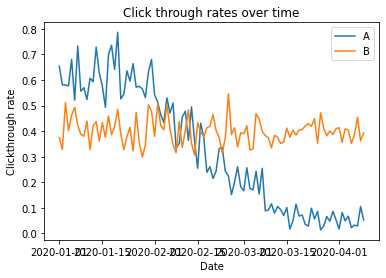

In [ ]:
plt.title("Click through rates over time")
plt.plot(daily_viewsA["has_clicked"], label = "A")
plt.plot(daily_ViewsB["has_clicked"], label = "B")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Clickthrough rate")

Text(0, 0.5, 'pade load times(ms)')

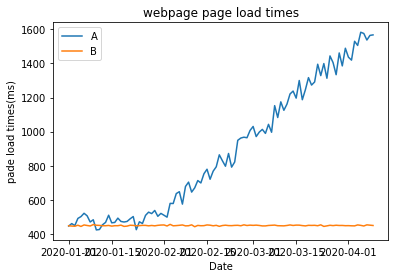

In [ ]:
plt.title("webpage page load times")
plt.plot(daily_viewsA["page_load_ms"], label = "A")
plt.plot(daily_ViewsB["page_load_ms"], label = "B")
plt.legend()
plt.xlabel("Date")
plt.ylabel("pade load times(ms)")

In [ ]:
viewsA["page_load_ds"] = viewsA["page_load_ms"]//20 * 20
page_load = viewsA.set_index("page_load_ds")
page_load = viewsA.groupby(["page_load_ds"])
page_load = page_load.mean()
page_load = page_load.sort_index()
page_load

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,page_load_ms,video_watched_s,product_s,pricing_s,has_clicked,video_watched_s_trunc
page_load_ds,,,,,,
360.0,373.062992,34.854123,7.648758,0.0,1.000000,34.099924
380.0,391.743421,34.120934,7.939644,0.0,0.807018,33.542549
400.0,410.297114,33.428049,8.121070,0.0,0.876061,32.852020
420.0,429.770039,33.345551,8.047440,0.0,0.865119,32.710819
440.0,449.489247,32.754347,8.035906,0.0,0.802316,32.173638
...,...,...,...,...,...,...
1580.0,1589.747215,2.539264,7.964382,0.0,0.000000,2.539264
1600.0,1608.739709,2.495703,8.001280,0.0,0.000000,2.495703
1620.0,1629.510736,2.464949,8.013825,0.0,0.000000,2.464949


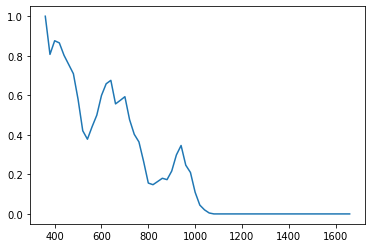

In [ ]:
plt.plot(page_load["has_clicked"])

In [ ]:
import numpy as np
m,b = np.polyfit(page_load.index, page_load["has_clicked"], 1)
m*100

-0.06780367509768512

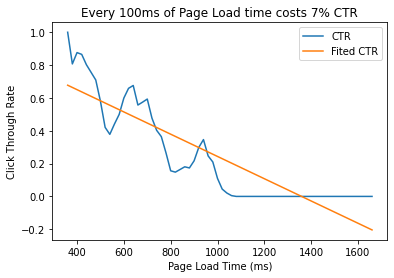

In [ ]:
plt.title("Every 100ms of Page Load time costs 7% CTR")
plt.plot(page_load["has_clicked"], label="CTR")
plt.plot(page_load.index, m* page_load.index + b, label="Fited CTR")
plt.xlabel("Page Load Time (ms)")
plt.ylabel("Click Through Rate")
plt.legend()

In [ ]:
viewsA[viewsA["page_load_ms"]< 550]["has_clicked"].mean()

0.7034065584208851

In [ ]:
viewsB["has_clicked"].mean()

0.39660223599137934

In [ ]:
clicksA = get_click_events(viewsA)
clicksAdaily = events_per_day(clicksA)
clicksB = get_click_events(viewsB)
clicksBdaily = events_per_day(clicksB)
clicksAdaily

2020-01-01    340
2020-01-02    322
2020-01-03    277
2020-01-04    330
2020-01-05    307
             ... 
2020-04-05     21
2020-04-06     29
2020-04-07     26
2020-04-08    102
2020-04-09     47
Name: created_at, Length: 100, dtype: int64

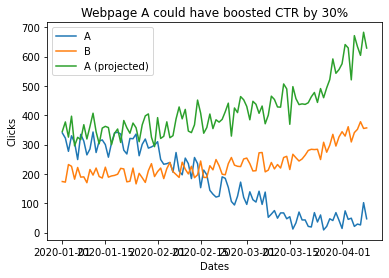

In [ ]:
plt.title("Webpage A could have boosted CTR by 30%")
plt.plot(clicksAdaily, label="A")
plt.plot(clicksBdaily, label="B")
plt.plot(views_per_day *0.70 *0.5, label="A (projected)")
plt.xlabel("Dates")
plt.ylabel("Clicks")
plt.legend()

# Summary
I have produced three quality figures that support data-driven business decision. In sum, I recommend picking webpage A with the informational video, there are three reasons. 

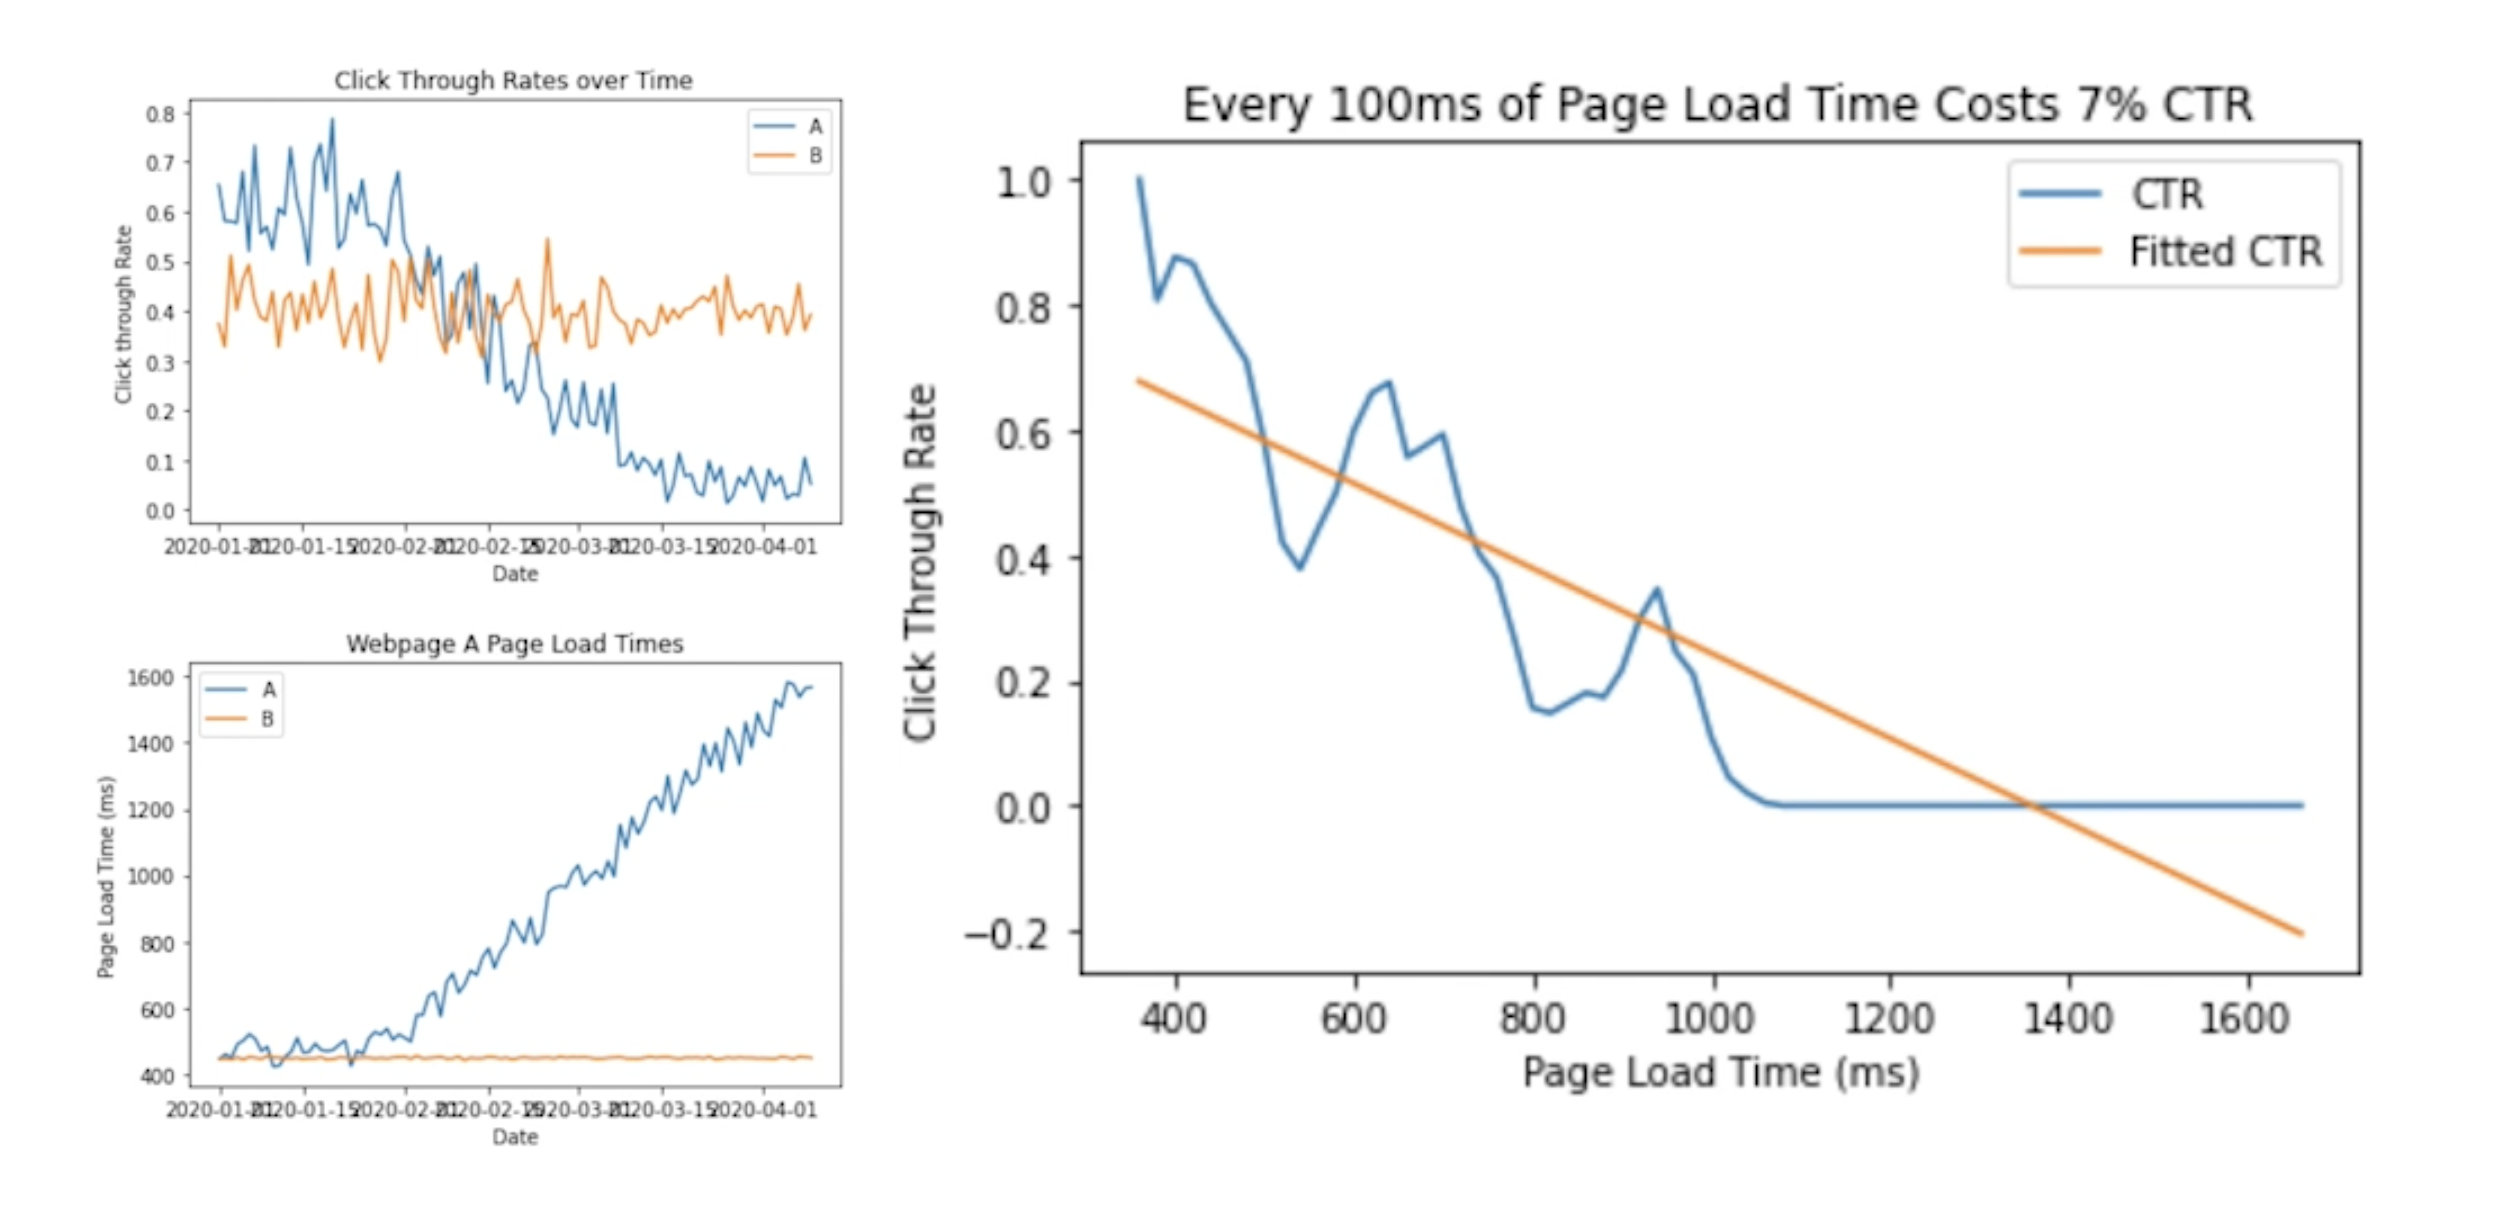

1.   Watching informational video is strongly correlated with cooking the sign up. 

2.   By contrast, reading the pricing section has near zero bearing on whether or not the user clicks to sign up.

3. Starting with the top left, I then showed that webpage A's click-through rate dropped precipitously. In the bottom left, I showed that webpage A's dropped click-through rate happened at the same time webpage A's page load times increased suddenly. On the right, I then show that webpage A's increased page load time resulted in drastic drops in click-through rate. 

This suggests that webpage A's overall click-through rate cannot be trusted. Finally, I projected what webpage A's click-through rate would have been throughout the experiment had page load times not shot up two months into the experiment. We can see that webpage A would have consistently sustained a 30 percent higher click-through rate than webpage B,justifying my final recommendation of webpage A. 

That concludes the data-driven business recommendation.



